# Import

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import plotly.express as px
import missingno as msno

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load Data

In [3]:
train_df = pd.read_json('../data/train.json')
test_df = pd.read_json('../data/test.json')

#### train data : 14,271 rows x 23 columns including `price`

In [4]:
train_df

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
0,8448321,Bangkok,Watthana,Phra Khanong Nuea,"36 Soi Sukhumvit 63, Ekamai Road",Condo,273.0,2.0,2.0,66,...,100.584850,2,"[[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]",NaN,16.0,20,2011,June,"[Car Park, Community Garden, CCTV, Fitness cor...",8500000
1,10936325,Bangkok,Watthana,Khlong Toei Nuea,31 สุขุมวิท,Condo,74.0,1.0,1.0,49,...,100.566949,3,"[[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...",NaN,11.0,20,2012,September,"[CCTV, Fitness corner, 24 hours security, Swim...",5900000
2,10927931,Bangkok,Khlong Toei,Khlong Tan,"68 Sukhumvit 24 Alley, Khong Tan",Condo,940.0,1.0,1.0,34,...,100.565660,2,"[[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...",NaN,20.0,20,2017,January,"[Car Park, Clubhouse, Community Garden, CCTV, ...",6290000
3,11004792,Nonthaburi,Bang Kruai,Bang Khun Kong,Bang Khun Kong,Detached House,NaN,3.0,3.0,170,...,100.428438,0,None,NaN,2.0,4,0,None,"[Covered car park, Playground, 24 hours securi...",8900000
4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,NaN,3.0,2.0,120,...,100.494129,1,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",NaN,6.0,15,0,None,"[Covered car park, 24 hours security]",2390000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14266,10738911,Nonthaburi,Mueang Nonthaburi,Bang Kraso,36/2 รัตนาธิเบศร์,Condo,648.0,2.0,1.0,58,...,100.504931,2,"[[PP10 Bang Krasor MRT, 90], [PP11 Nonthaburi ...",NaN,14.0,11,2015,August,"[Covered car park, Lounge, 24 hours security, ...",4000000
14267,11031178,Nonthaburi,Bang Bua Thong,Phimon Rat,Phimonrat,Townhouse,NaN,3.0,2.0,85,...,100.359562,0,None,NaN,4.0,3,0,None,[],1790000
14268,10945909,Bangkok,Saphan Sung,Saphan Sung,Soi Ramkhamhaeng 164,Detached House,300.0,3.0,3.0,170,...,100.712196,0,None,20.0,11.0,5,0,None,"[Clubhouse, Community Garden, CCTV, 24 hours s...",4550000
14269,10768246,Bangkok,Don Mueang,Sanam Bin,วิภาวดีรังสิต,Townhouse,NaN,2.0,2.0,150,...,100.573063,0,None,NaN,10.0,8,0,None,[Covered car park],1950000


#### test data : 2,500 rows x 22 columns w/o `price`

In [5]:
test_df

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,latitude,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities
0,10317868,Samut Prakan,Bang Phli,Bang Phli Yai,Nam Daeng Road Yai,Detached House,800.0,4.0,3.0,120,...,13.614196,100.680610,0,None,NaN,9.0,5,0,None,"[Clubhouse, Community Garden, CCTV, Pavillion,..."
1,10885829,Bangkok,Nong Khaem,Nong Khang Phlu,Machareon Road,Detached House,107.0,4.0,3.0,188,...,13.702222,100.341833,0,None,20.0,9.0,5,2020,None,"[Car Park, Clubhouse, Community Garden, CCTV, ..."
2,10765951,Bangkok,Huai Khwang,Huai Khwang,72 Rama 9,Condo,433.0,1.0,1.0,22,...,13.755713,100.566385,3,"[[BL20 Phra Ram 9 MRT, 270], [E4 Asok BTS, 780...",NaN,13.0,20,2015,September,"[Covered car park, CCTV, Fitness corner, 24 ho..."
3,10003549,Bangkok,Khlong Toei,Khlong Tan,"772 Sukhumvit Road, Khong Tan",Condo,656.0,1.0,1.0,41,...,13.724295,100.577202,1,"[[E6 Thong Lo BTS, 70]]",20.0,16.0,20,2013,June,"[Car Park, Covered car park, CCTV, Fitness cor..."
4,10663026,Bangkok,Lak Si,Thung Song Hong,222 Ngamwongwan Road,Condo,1458.0,1.0,1.0,29,...,13.855437,100.547923,0,None,20.0,10.0,14,2012,September,"[Covered car park, CCTV, Fitness corner, 24 ho..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,10889363,Bangkok,Bang Rak,Maha Phruettharam,660-662 Rama 4 Road,Condo,1598.0,1.0,1.0,33,...,13.733237,100.526269,2,"[[BL27 Sam Yan MRT, 410], [S2 Sala Daeng BTS, ...",NaN,18.0,20,2016,September,"[Amphitheatre, Covered car park, Community Gar..."
2496,10975839,Bangkok,Sathon,Thung Maha Mek,88 Narathiwatratchanakharin Road,Condo,493.0,1.0,1.0,65,...,13.719377,100.531092,3,"[[B1 Sathorn BRT, 180], [B2 Arkan Songkhro BRT...",20.0,20.0,20,2009,July,"[Covered car park, CCTV, Fitness corner, Sauna..."
2497,10986832,Bangkok,Bang Phlat,Bang Yi Khan,"1521 Soi Arun Amarin 53, Arun Amarin Road",Condo,1121.0,1.0,1.0,42,...,13.772913,100.492732,1,"[[BL05 Bang Yi Khan MRT, 910]]",NaN,5.0,7,2009,January,"[Car Park, Community Garden, CCTV, Fitness cor..."
2498,10687627,Samut Prakan,Mueang Samut Prakan,Samrong Nuea,Thang Rotfai Sai Kao Road,Condo,719.0,1.0,1.0,28,...,13.653037,100.592954,1,"[[E15 Samrong BTS, 800]]",19.0,13.0,20,2016,December,"[Covered car park, CCTV, Fitness corner, 24 ho..."


# EDA examples

#### target value : `price`

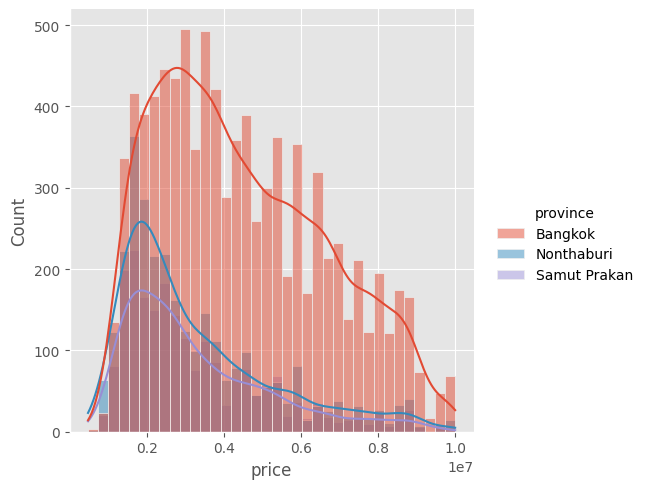

In [6]:
sns.displot(x="price", hue='province', kde=True, data=train_df)

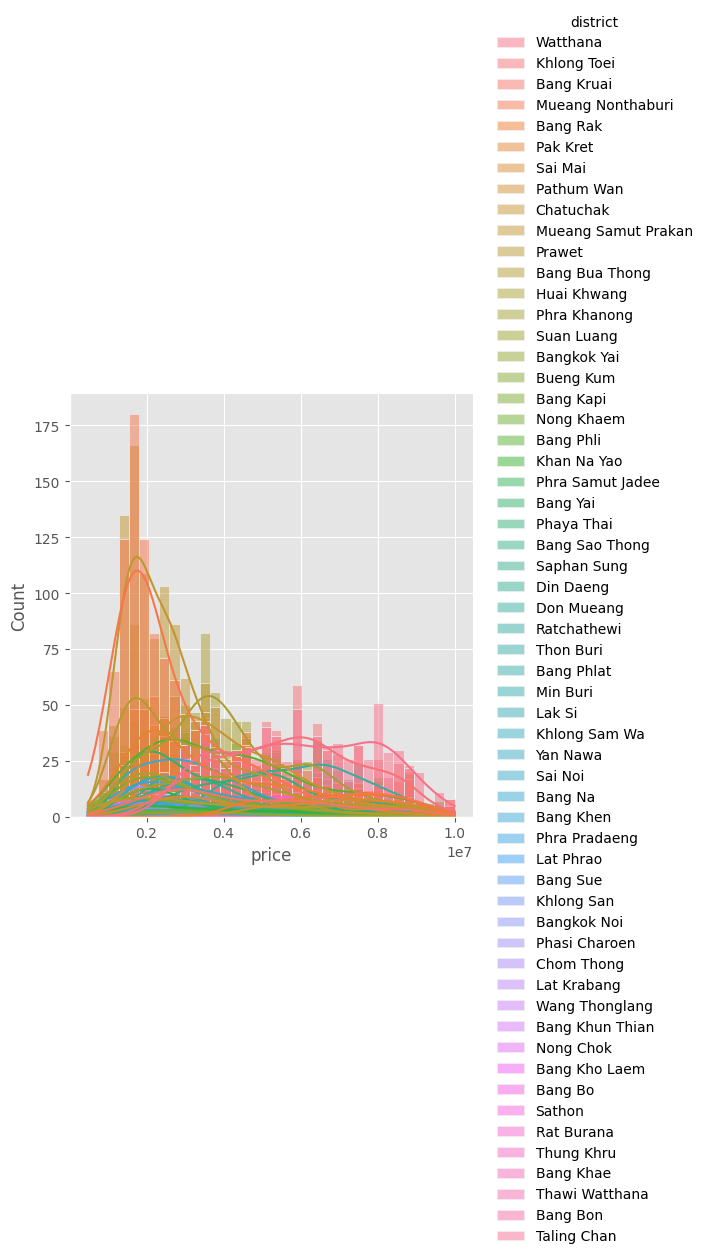

In [7]:
sns.displot(x="price", hue='district', kde=True, data=train_df)

#### missing value

In [8]:
train_df.groupby('property_type')['id'].count()

property_type
Condo             9206
Detached House    2169
Townhouse         2896
Name: id, dtype: int64

In [9]:
train_df.groupby('province')['id'].count()

province
Bangkok         9130
Nonthaburi      2970
Samut Prakan    2171
Name: id, dtype: int64

In [10]:
train_df[train_df['bedrooms'].isna()]

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
854,10080251,Bangkok,Phra Khanong,Bang Chak,Soi Sukhumvit 97/1,Condo,1245.0,NaN,1.0,29,...,100.614429,0,None,NaN,7.0,6,2019,None,"[Community Garden, CCTV, Fitness corner, 24 ho...",1550000
1071,10815633,Nonthaburi,Pak Kret,Pak Kret,Changwattana Road,Condo,525.0,NaN,1.0,46,...,100.511452,0,None,20.0,3.0,10,2011,July,"[Car Park, Community Garden, CCTV, Gymnasium r...",1450000
1079,8132288,Bangkok,Lat Krabang,Lat Krabang,Lat Krabang,Detached House,NaN,NaN,3.0,59,...,100.777442,0,None,8.0,NaN,2,0,None,"[BBQ pits, Covered car park, Clubhouse, Gymnas...",5990000
1359,10538163,Bangkok,Bang Phlat,Bang O,along the expressway Si Rat Road-Outer Ring Road,Townhouse,253.0,NaN,NaN,145,...,100.495681,0,None,NaN,7.0,2,2018,None,"[Clubhouse, Community Garden, CCTV, Fitness co...",5600000
1987,10102700,Bangkok,Suan Luang,Suan Luang,Suan Luang,Townhouse,NaN,NaN,3.0,250,...,100.653444,0,None,15.0,6.0,6,0,None,"[Gymnasium room, 24 hours security, Swimming p...",8600000
2001,9772842,Nonthaburi,Bang Bua Thong,Lam Pho,โยธาธิการ นนทบุรี2029,Detached House,NaN,NaN,2.0,93,...,100.383479,0,None,5.0,2.0,3,0,None,[],2750000
2327,10677805,Bangkok,Huai Khwang,Sam Sen Nok,"Soi Ratchadapisek 20, Ratchadapisek Road",Condo,456.0,NaN,NaN,35,...,100.576232,2,"[[BL17 Sutthisan MRT, 270], [BL16 Ratchadaphis...",NaN,13.0,13,2007,December,"[Car Park, Community Garden, CCTV, Fitness cor...",2590000
2357,10678027,Bangkok,Khlong San,Khlong Ton Sai,543 Taksin Road,Condo,593.0,NaN,NaN,75,...,100.506853,3,"[[G1/S7 Krung Thon Buri BTS, 350], [G2 Charoen...",NaN,12.0,20,2013,June,"[Car Park, Covered car park, Clubhouse, CCTV, ...",8990000
2696,10313851,Bangkok,Huai Khwang,Sam Sen Nok,"Soi Ratchadapisek 20, Ratchadapisek Road",Condo,456.0,NaN,1.0,43,...,100.576232,2,"[[BL17 Sutthisan MRT, 270], [BL16 Ratchadaphis...",NaN,13.0,13,2007,December,"[Car Park, Community Garden, CCTV, Fitness cor...",3200000
2788,10768445,Bangkok,Bang Khae,Bang Khae Nuea,"Soi Petchkasem 68, Petchkasem Road",Condo,222.0,NaN,NaN,48,...,100.416768,2,"[[BL37 Bang Khae MRT, 620], [BL38 Lak Song MRT...",NaN,7.0,20,2015,March,"[Car Park, Covered car park, CCTV, Fitness cor...",2790000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14271 entries, 0 to 14270
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       14271 non-null  int64  
 1   province                 14271 non-null  object 
 2   district                 14271 non-null  object 
 3   subdistrict              14260 non-null  object 
 4   address                  14271 non-null  object 
 5   property_type            14271 non-null  object 
 6   total_units              10509 non-null  float64
 7   bedrooms                 14228 non-null  float64
 8   baths                    14236 non-null  float64
 9   floor_area               14271 non-null  int64  
 10  floor_level              8093 non-null   float64
 11  land_area                4917 non-null   float64
 12  latitude                 14271 non-null  float64
 13  longitude                14271 non-null  float64
 14  nearby_stations       

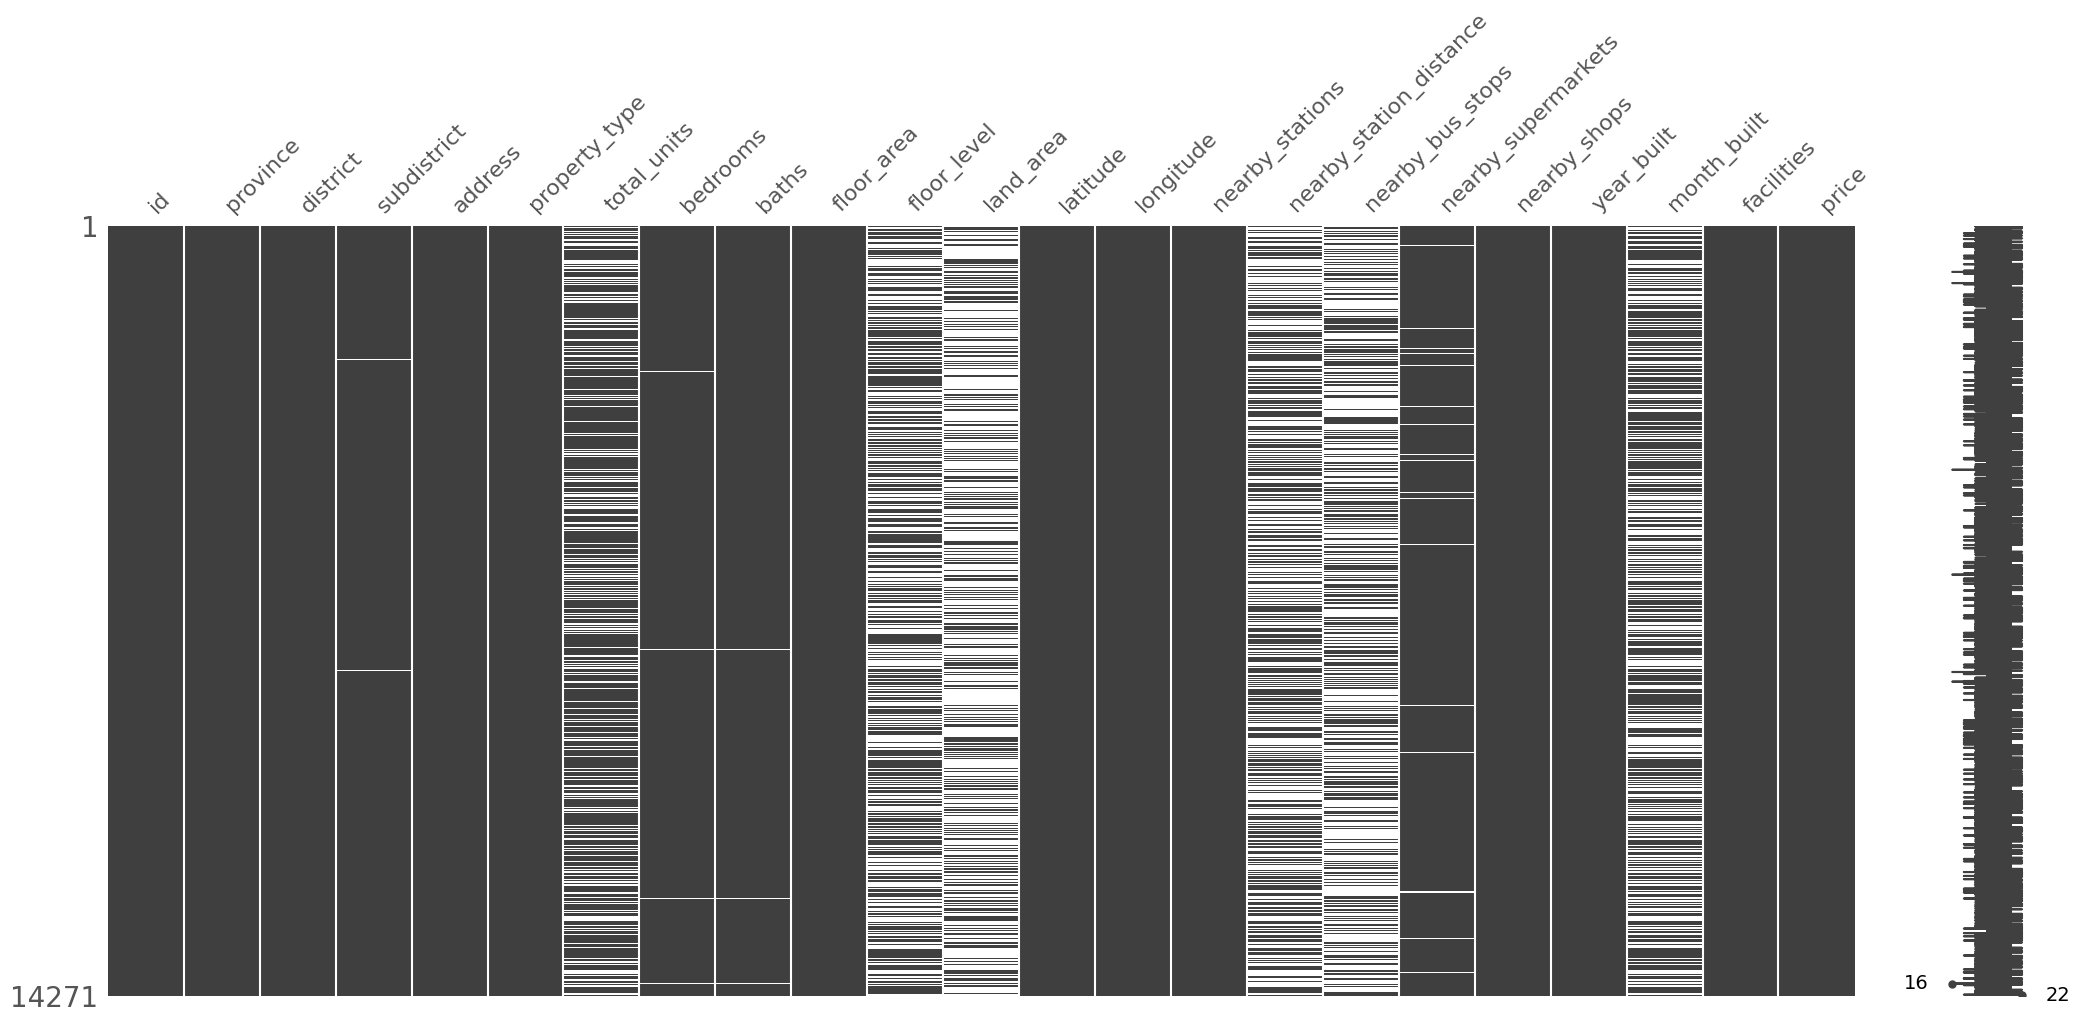

In [11]:
train_df.info()
msno.matrix(train_df);

#### `property_type` and `province`

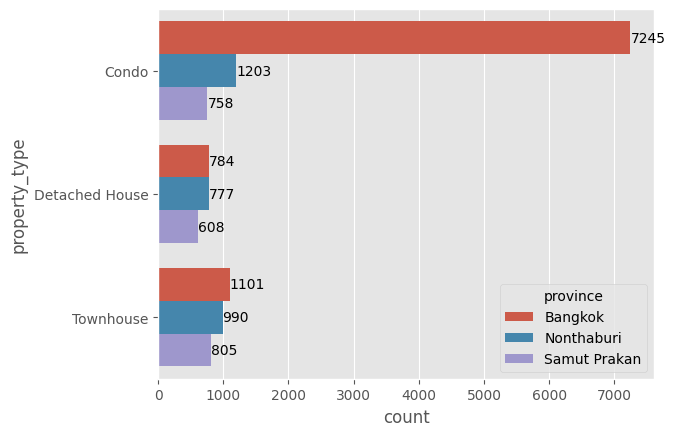

In [12]:
ax = sns.countplot(y='property_type', hue="province", data=train_df)
for i in range(3):
    ax.bar_label(ax.containers[i])

#### Try to find correlation

In [45]:
plt.figure(figsize=(16, 9))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: >

#### scatter plot

<Axes: xlabel='floor_area', ylabel='price'>

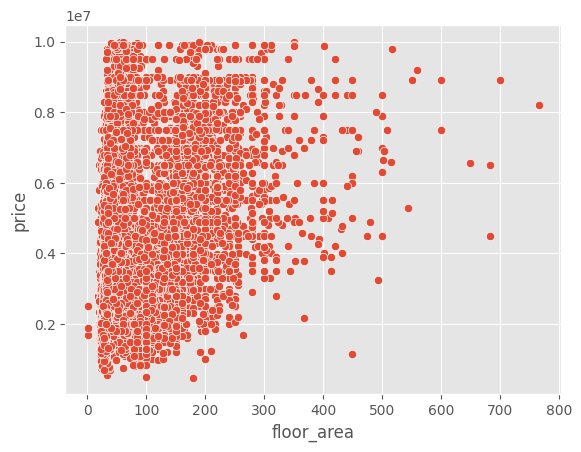

In [14]:
sns.scatterplot(x='floor_area', y='price', data=train_df)

#### facilities

In [15]:
from collections import Counter

facility_count = Counter()
for f in train_df.facilities:
    facility_count.update(f)

facility_count.most_common(10)

[('24 hours security', 11675),
 ('CCTV', 10504),
 ('Swimming pool', 9993),
 ('Fitness corner', 9148),
 ('Covered car park', 6182),
 ('Car Park', 5533),
 ('Community Garden', 3528),
 ('Lift lobby', 3195),
 ('Gymnasium room', 2661),
 ('Clubhouse', 2492)]

#### map

In [16]:
fig = px.scatter_mapbox(
    data_frame=train_df,
    lat="latitude",
    lon="longitude",
    hover_data=["id", "price"],
    color="province",
    size="price",
    zoom=10,
    height=1000,
    width=1000)
fig.update_layout(mapbox_style='open-street-map')
fig.show()

## Experiment How Far From Siam
create function to get distant from Siam (hypothesis that Siam is Expensive price for Accomodation)


In [17]:
def distant_to_siam(lat, long):
    # https://maps.app.goo.gl/E954o1rAdTKxDHyG6
    siam_lat = 13.7465
    siam_long = 100.532
    return np.sqrt((lat - siam_lat)**2 + (long - siam_long)**2)

# Modelling

#### feature selection

In [18]:
# Experiment
train_df['distant_to_siam'] = train_df.apply(lambda x: distant_to_siam(x['latitude'], x['longitude']), axis=1)
test_df['distant_to_siam'] = test_df.apply(lambda x: distant_to_siam(x['latitude'], x['longitude']), axis=1)


In [19]:
train_df['nearby_station_distance']

0          [[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]
1        [[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...
2        [[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...
3                                                     None
4                       [[PP09 Yaek Nonthaburi 1 MRT, 10]]
                               ...                        
14266    [[PP10 Bang Krasor MRT, 90], [PP11 Nonthaburi ...
14267                                                 None
14268                                                 None
14269                                                 None
14270    [[S8 Wongwian Yai BTS, 200], [G1/S7 Krung Thon...
Name: nearby_station_distance, Length: 14271, dtype: object

In [20]:
# split facilities to columns
for col in facility_count.keys():
  train_df[col] = train_df["facilities"].apply(lambda x: 1 if col in x else 0)
  test_df[col] = test_df["facilities"].apply(lambda x: 1 if col in x else 0)

list(facility_count.keys())  

['Car Park',
 'Community Garden',
 'CCTV',
 'Fitness corner',
 '24 hours security',
 'Swimming pool',
 'Clubhouse',
 'Covered car park',
 'Playground',
 'Sky Lounge',
 'Mini-Mart',
 'Sauna',
 'Gymnasium room',
 'Library',
 'Lift lobby',
 'Lounge',
 'Steam bath',
 "Children's Playground",
 'Community Plaza',
 'Club',
 'Pavillion',
 'Function room',
 'Game room',
 'Wading pool',
 'BBQ pits',
 'Putting Green',
 'Jacuzzi',
 'Meeting room',
 'Open car park',
 'Jogging track',
 'Pool Deck',
 'Roof Terrace',
 'Multi-purpose hall',
 'Launderette',
 'Basketball court',
 'Multi-Storey Car Park',
 'Adult Fitness Stations',
 'Aircon Facilities',
 'Billiards room',
 'Cafes',
 'Driving range',
 'Eateries',
 'Karaoke',
 'Lap pool',
 'Main entrance',
 'Pantry',
 'Spa pool',
 'Badminton hall',
 'Mini golf range',
 'Tennis courts',
 'Reflexology Path',
 'Basement car park',
 'Utilities Center',
 'Fun pool',
 'Drop Off Point',
 'Amphitheatre',
 'Electrical Sub-Station',
 'Bowling alley',
 'Adventure park

In [21]:
# district
train_df['district'].isna().sum()
test_df['district'].isna().sum()

0

In [22]:
train_df['floor_level'].isna().sum()

6178

<Axes: xlabel='property_type', ylabel='floor_level'>

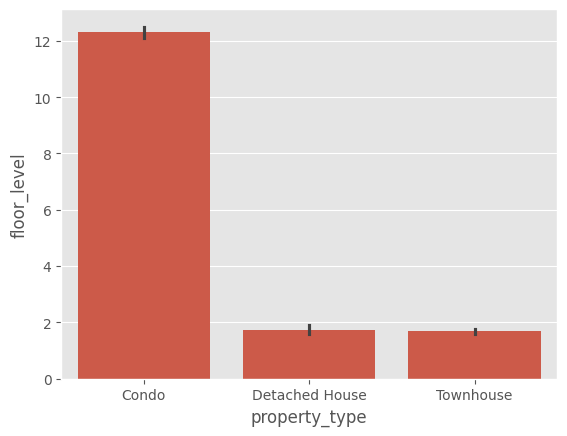

In [23]:
train_df.groupby('property_type')['floor_level'].mean()
sns.barplot(x='property_type', y='floor_level', data=train_df)

In [24]:
for property_type, mean_value in train_df.groupby('property_type')['floor_level'].mean().items():
  train_df.loc[(train_df['property_type'] == property_type ) & (train_df['floor_level'].isna()), 'floor_level'] = mean_value

for property_type, mean_value in test_df.groupby('property_type')['floor_level'].mean().items():
  test_df.loc[(test_df['property_type'] == property_type ) & (test_df['floor_level'].isna()), 'floor_level'] = mean_value  

#### History of Fail
I dont clean it as though process history

In [25]:
# try to included land_area in model but didnt effect much
# x = 4.305785
# train_df['floor_area'] = ( train_df["land_area"].fillna(0) * x ) + train_df["floor_area"]
# test_df['floor_area'] = ( test_df["land_area"].fillna(0) * x )+ test_df["floor_area"]

In [26]:
# fillna baths to mean
train_df['baths'] = train_df['baths'].fillna(train_df['baths'].mean())
test_df['baths'] = test_df['baths'].fillna(test_df['baths'].mean())

In [27]:
# fillna bedrooms to mean
train_df['bedrooms'] = train_df['bedrooms'].fillna(train_df['bedrooms'].mean())
test_df['bedrooms'] = test_df['bedrooms'].fillna(test_df['bedrooms'].mean())

#### Switch Approach evident

In [28]:
# total units
# train_df['total_units'].fillna(1, inplace=True)
# test_df['total_units'].fillna(1, inplace=True)

# second approach
for property_type, mean_value in train_df.groupby('property_type')['total_units'].mean().items():
  train_df.loc[(train_df['property_type'] == property_type ) & (train_df['total_units'].isna()), 'total_units'] = mean_value

for property_type, mean_value in test_df.groupby('property_type')['total_units'].mean().items():
  test_df.loc[(test_df['property_type'] == property_type ) & (test_df['total_units'].isna()), 'total_units'] = mean_value  

In [29]:
# EDA nearby_bus_stops
train_df['nearby_bus_stops'].fillna(train_df['nearby_bus_stops'].mean(), inplace=True)
test_df['nearby_bus_stops'].fillna(test_df['nearby_bus_stops'].mean(), inplace=True)

In [30]:
# EDA nearby_supermarkets
train_df['nearby_supermarkets'].fillna(train_df['nearby_supermarkets'].mean(), inplace=True)
test_df['nearby_supermarkets'].fillna(test_df['nearby_supermarkets'].mean(), inplace=True)

In [31]:
feat_num = ['distant_to_siam', 'floor_area', 'total_units', 'baths', 'bedrooms', 'floor_level', 'nearby_shops', 'nearby_stations', 'nearby_bus_stops', 'nearby_supermarkets'] + list(facility_count.keys())
feat_cat = ['property_type', 'province', 'district']

train_df[feat_num + feat_cat].info() # check non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14271 entries, 0 to 14270
Data columns (total 78 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   distant_to_siam            14271 non-null  float64
 1   floor_area                 14271 non-null  int64  
 2   total_units                14271 non-null  float64
 3   baths                      14271 non-null  float64
 4   bedrooms                   14271 non-null  float64
 5   floor_level                14271 non-null  float64
 6   nearby_shops               14271 non-null  int64  
 7   nearby_stations            14271 non-null  int64  
 8   nearby_bus_stops           14271 non-null  float64
 9   nearby_supermarkets        14271 non-null  float64
 10  Car Park                   14271 non-null  int64  
 11  Community Garden           14271 non-null  int64  
 12  CCTV                       14271 non-null  int64  
 13  Fitness corner             14271 non-null  int

#### train - dev split

In [32]:
X = pd.get_dummies(train_df[feat_num + feat_cat], columns=feat_cat, drop_first=True)
y = train_df['price']

X_train, X_dev, y_train, y_dev = train_test_split(X, y, train_size=0.8, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_dev.shape)
print(y_dev.shape)

(11416, 136)
(11416,)
(2855, 136)
(2855,)


#### Dummy Regressor

In [33]:
# Excluded from current model
# model_dummy = DummyRegressor(strategy='mean')
# model_dummy.fit(X_train, y_train)

# pred_train = model_dummy.predict(X_train)
# pred_dev = model_dummy.predict(X_dev)

# print("R2 Score of train :",  r2_score(y_train, pred_train))
# print("R2 Score of dev   :",  r2_score(y_dev, pred_dev))
# print()
# print("RMSE of train :", mean_squared_error(y_train, pred_train, squared=False))
# print("RMSE of test  :", mean_squared_error(y_dev, pred_dev, squared=False))

#### residual plot

In [34]:
# df_result = pd.DataFrame({'true':y_train, 'pred':pred_train})
# df_result['residual'] = df_result['pred'] - df_result['true']

# sns.scatterplot(y='pred', x='true', data=df_result)
# plt.plot(np.linspace(0, 1e7, 100), np.linspace(0, 1e7, 100), color='green');

#### Simple Linear Regressor

In [35]:
# LR 
lr = LinearRegression()
lr.fit(X_train, y_train)

pred_train = lr.predict(X_train)
pred_dev = lr.predict(X_dev)

print("R2 Score of train :",  r2_score(y_train, pred_train))
print("R2 Score of dev   :",  r2_score(y_dev, pred_dev))
print()
print("RMSE of train :", mean_squared_error(y_train, pred_train, squared=False))
print("RMSE of test  :", mean_squared_error(y_dev, pred_dev, squared=False))

R2 Score of train : 0.6753565984224819
R2 Score of dev   : 0.6952693456667456

RMSE of train : 1238745.8235108226
RMSE of test  : 1215881.3047404697


#### residual plot

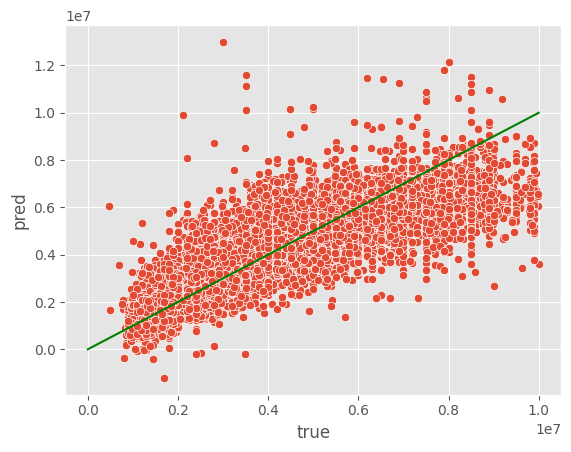

In [36]:
df_result = pd.DataFrame({'true':y_train, 'pred':pred_train})
df_result['residual'] = df_result['pred'] - df_result['true']

sns.scatterplot(y='pred', x='true', data=df_result)
plt.plot(np.linspace(0, 1e7, 100), np.linspace(0, 1e7, 100), color='green');

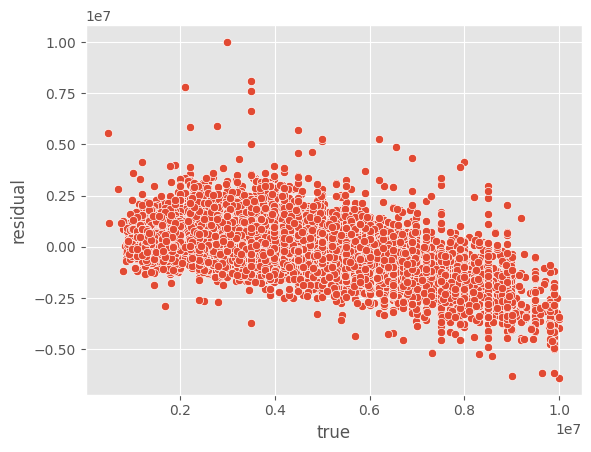

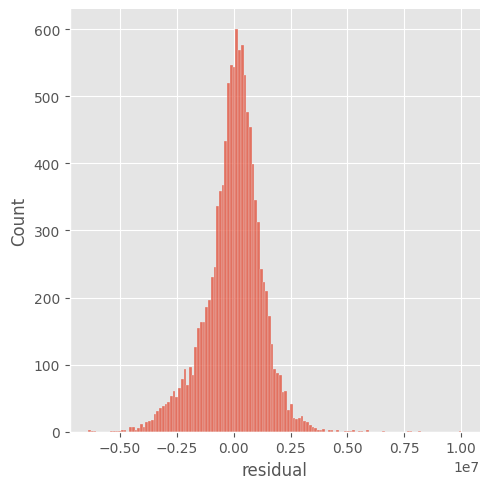

In [37]:
sns.scatterplot(x='true', y='residual', data=df_result)
sns.displot(x='residual', data=df_result)

# How to submit

- preprocess test data in the same way as train data
- after that, predict `price` and create `submission.csv`
- `submission.csv` must have 2 columns: `id` and `price`
- **NEVER** drop any row in the test data

In [38]:
# test data has id and features, but does not have price
test_df.head()

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,Amphitheatre,Electrical Sub-Station,Bowling alley,Adventure park,Elderly Wellness Stations,Existing Bus Stop,Precinct Pavilion,Squash court,Aerobic pool,Covered Linkways
0,10317868,Samut Prakan,Bang Phli,Bang Phli Yai,Nam Daeng Road Yai,Detached House,800.0,4.0,3.0,120,...,0,0,0,0,0,0,0,0,0,0
1,10885829,Bangkok,Nong Khaem,Nong Khang Phlu,Machareon Road,Detached House,107.0,4.0,3.0,188,...,0,0,0,0,0,0,0,0,0,0
2,10765951,Bangkok,Huai Khwang,Huai Khwang,72 Rama 9,Condo,433.0,1.0,1.0,22,...,0,0,0,0,0,0,0,0,0,0
3,10003549,Bangkok,Khlong Toei,Khlong Tan,"772 Sukhumvit Road, Khong Tan",Condo,656.0,1.0,1.0,41,...,0,0,0,0,0,0,0,0,0,0
4,10663026,Bangkok,Lak Si,Thung Song Hong,222 Ngamwongwan Road,Condo,1458.0,1.0,1.0,29,...,0,0,0,0,0,0,0,0,0,0


In [39]:
test_df[feat_num + feat_cat].info() # check non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 78 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   distant_to_siam            2500 non-null   float64
 1   floor_area                 2500 non-null   int64  
 2   total_units                2500 non-null   float64
 3   baths                      2500 non-null   float64
 4   bedrooms                   2500 non-null   float64
 5   floor_level                2500 non-null   float64
 6   nearby_shops               2500 non-null   int64  
 7   nearby_stations            2500 non-null   int64  
 8   nearby_bus_stops           2500 non-null   float64
 9   nearby_supermarkets        2500 non-null   float64
 10  Car Park                   2500 non-null   int64  
 11  Community Garden           2500 non-null   int64  
 12  CCTV                       2500 non-null   int64  
 13  Fitness corner             2500 non-null   int64

In [40]:
# preprocessing test
X_test = pd.get_dummies(test_df[feat_num + feat_cat], columns=feat_cat, drop_first=True)

print(X_test.shape)

(2500, 136)


In [41]:
# prediction Dummy
# pred_test = model_dummy.predict(X_test)
# pred_test[:10]
# X_test = ss.transform(X_test)

In [42]:
# prediction LR
pred_test = lr.predict(X_test)
pred_test[:10]

array([5749795.94449888, 6033969.30083623, 4740867.94101807,
       5027094.59586904, 2612155.93755303, 5416590.38137561,
       3432707.76698846, 4057255.71249777, 3480001.16805914,
       4122943.76976745])

In [43]:
# save as csv file
test_df['price'] = pred_test
test_df[['id','price']].to_csv('../submissions/submission.csv', index=False)